# __Immigration__

### Importing required libraries

In [4]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Immigration is divided into _four_ subcategories: 

# __1. Immigration Counter:__

In [5]:
#Importing dataset
df = pd.read_csv("immigration_1.csv")
df.head()

,full_text,sentiment
0,immigration for international arrivals at bang...,Positive
1,sir nothing beats efficiency of bangalore a...,Negative
2,immigration process at bangalore airport is fa...,Positive
3,recently had an interesting conversation at ...,Positive
4,bangalore airport arrival lounge is amazingly ...,Positive


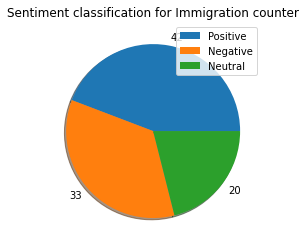

In [6]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
imm_count = val.values

#Plotting a pie chart
plt.pie(imm_count, labels = imm_count, shadow= True)
plt.title("Sentiment classification for Immigration counter")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding immigration counter:

### Topic Modelling

In [4]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['full_text'].tolist()

#Creating custom stop words
custom = ["kannada","india","waiting","arrival","12"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: like, process, screening, questions, told, let, informed, aug, international, people
Topic 2: spent, know, hours, check, immediately, people, queue, collect, quick, expect
Topic 3: check, officer, sir, recently, said, day, traveling, travel, learn, counters
Topic 4: time, check, security, crowded, flight, hours, times, really, outside, quick
Topic 5: test, just, pretty, hours, far, best, world, got, international, arrivals
Topic 6: like, blrairport, hello, countries, delhi, sir, queue, country, officer, make
Topic 7: staff, baggage, check, like, travel, plus, hand, customs, ai, experience
Topic 8: help, flight, efficient, check, customs, improve, lounge, thank, home, night
Topic 9: time, happen, sir, better, like, double, lol, checked, office, feels
Topic 10: long, felt, crazy, does, smooth, air, boarding, process, stuck, able


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

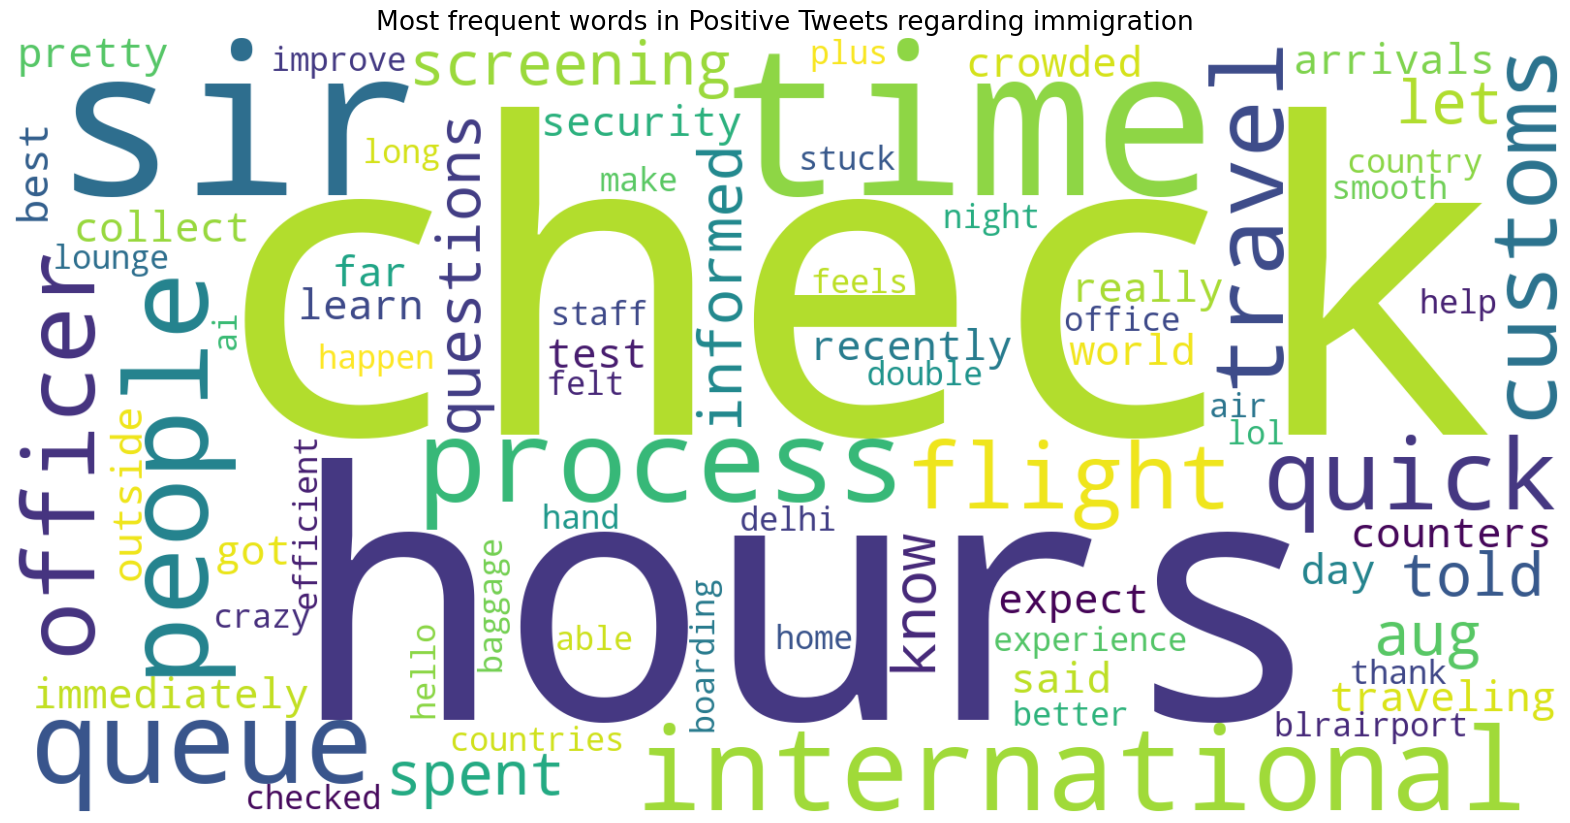

In [5]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding immigration counter', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding immigration counter
#### 1. Thorough and strict process at immigration is appreciated as it is crucial for national security
#### 2. People have thanked the staff for their guidance through the lengthy immigration process

## b.Topic modelling and wordcloud for negative tweets regarding immigration counter:

### Topic Modelling

In [6]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['full_text'].tolist()

#Creating custom stop words
custom = ["kannada","amp"]
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 7
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: delhi, new, authorities, travel, stopped, patel, staff, way, feel, officer
Topic 2: officer, passengers, worst, got, khan, salman, way, staff, guys, says
Topic 3: flights, passengers, time, bad, arrival, cisf, flight, matter, allow, urgent
Topic 4: going, staff, feb, security, lines, landed, check, wait, screening, pass
Topic 5: flight, fast, wait, hours, check, counter, feel, long, problem, recently
Topic 6: cbi, patel, stopped, aakar, thursday, circular, did, lookout, india, court
Topic 7: hours, 45, minutes, sir, asked, got, wait, staff, travel, way


### Word Cloud

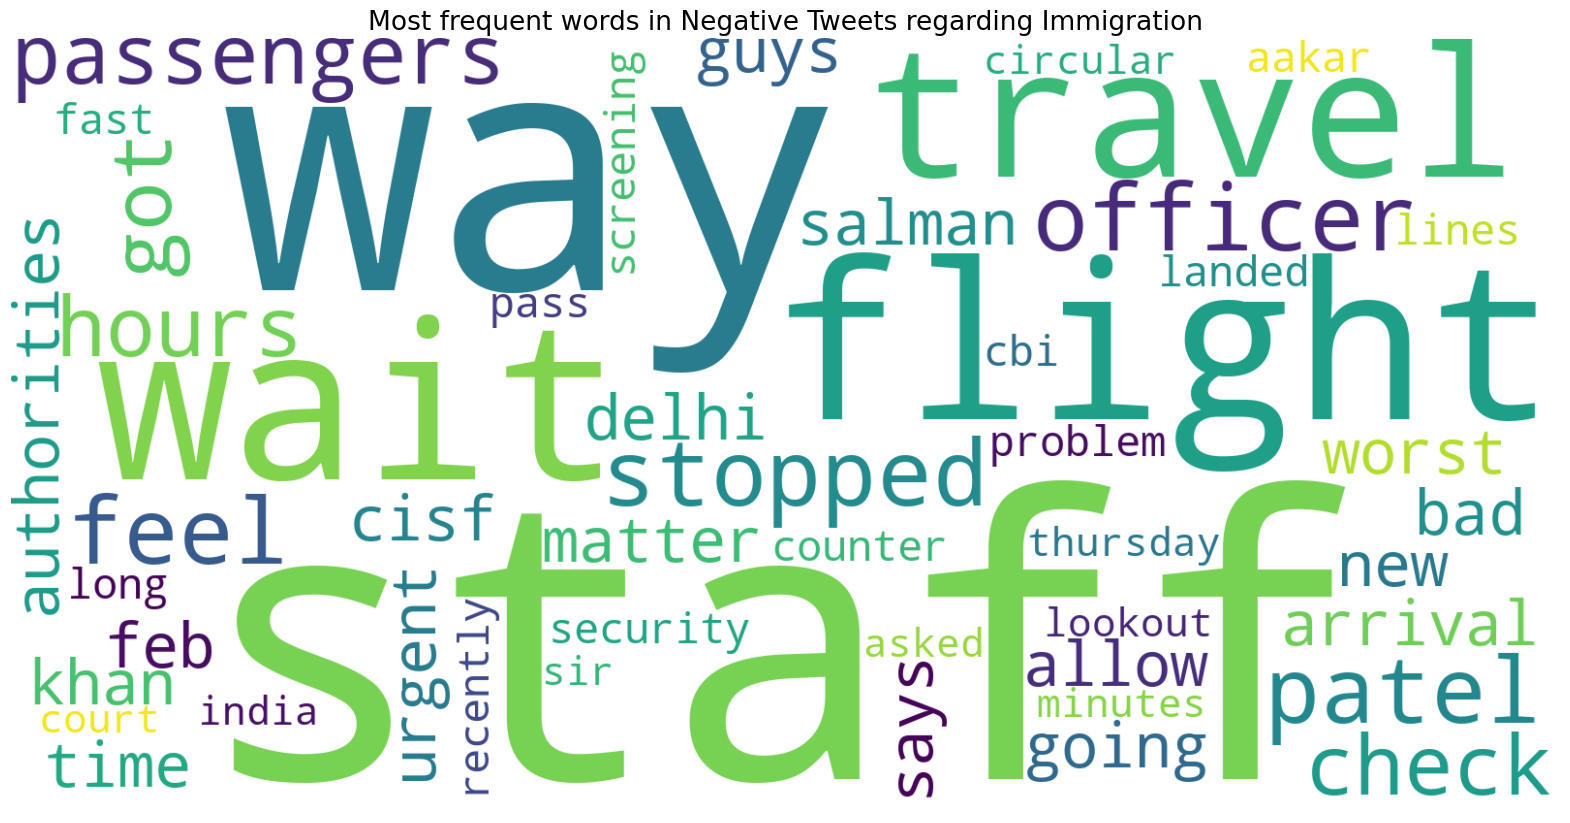

In [7]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Immigration counter', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding immigration counter
#### 1. Instances of travellers being harassed by the immigration officer for not knowing kannada is a big problem
#### 2. Long wait at the immigration counter has led to many people missing their flights
#### 3. Not getting a proper confirmation on the immigration request has led to many people getting stranded at airports
#### 4. Passengers mistreated and humiliated during immmigration is a constant complaint